### Enoncé:
- a1: Expliquer la variable continente en fonction des variables Dis Mag value, nombre total de décès, total affecté et total des dommages.
- b1: Déterminer la qualité du modèle.
- a2: Expliquer la variable Dis Mag value en fonction des variables nombre total de décès, total affecté et total des dommages.
- b2: Déterminer la qualité du modèle.
- a3: Etudier la stationarité des variables:  Dis Mag value,  nombre total de décès,  total affecté et total des dommages.
- b3: Expliquer la variable Dis Mag value en fonction des variables nombre total de décès, total affecté et total des dommages.

### Chargement des bibliothèques nécessaires et des données:

In [3]:
install.packages("readxl")
install.packages("nnet")
install.packages("tseries")
install.packages("vars")

library(readxl)
library(nnet)
library(tseries)
library(vars)

df <- read_excel("data/exercice2.xlsx", sheet = "Feuil1")
head(df)

Warning message:
"package 'readxl' is in use and will not be installed"
Warning message:
"package 'nnet' is in use and will not be installed"


Warning message:
"package 'tseries' is in use and will not be installed"
Warning message:
"package 'vars' is in use and will not be installed"


Continente,Dis_Mag_Value,nombre_total_de_deces,Total_Affecte,Total_des_dommages
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,8,12,40,500000
3,7,476,141277,100000
2,7,3,15,7310
4,7,1250,134250,6000
3,7,31,200,3150
1,8,100,2000,25000


### Modélisation avec la variable <code>Contiente</code>:

In [4]:
modele_a1 <- multinom(Continente ~ Dis_Mag_Value + nombre_total_de_deces +
                        Total_Affecte + Total_des_dommages, data = df)

summary(modele_a1)

# weights:  30 (20 variable)
initial  value 173.819295 
iter  10 value 165.148541
iter  20 value 131.900368
iter  30 value 125.614527
iter  40 value 125.098755
iter  50 value 124.569999
iter  60 value 123.846741
iter  70 value 122.842655
iter  80 value 122.716010
final  value 122.714668 
converged


Call:
multinom(formula = Continente ~ Dis_Mag_Value + nombre_total_de_deces + 
    Total_Affecte + Total_des_dommages, data = df)

Coefficients:
  (Intercept) Dis_Mag_Value nombre_total_de_deces Total_Affecte
2   -4.807929     0.6177011         -3.017864e-05  9.305018e-07
3    5.326481    -0.9018543         -3.933559e-04  1.298160e-06
4    7.680986    -1.4427079         -1.203217e-05  1.060519e-06
5   -6.456925     0.8655634         -2.439808e-02 -1.408477e-04
  Total_des_dommages
2       4.043856e-07
3       2.230761e-07
4       2.370130e-07
5      -1.795839e-04

Std. Errors:
   (Intercept) Dis_Mag_Value nombre_total_de_deces Total_Affecte
2 3.457665e-08  2.398805e-07          3.356182e-05  7.155007e-07
3 9.207998e-08  6.071898e-07          3.224619e-04  1.013857e-06
4 1.374329e-08  8.091810e-08          4.799140e-05  1.007641e-06
5 3.854395e-08  2.675433e-07          4.320014e-07  2.195122e-04
  Total_des_dommages
2       3.148590e-07
3       3.271382e-07
4       3.320683e-07
5      

### Interprétation:

#### (Intercept)
- **Catégorie 2** : Coefficient de -4.807929 (Erreur standard : 3.457665e-08)
- **Catégorie 3** : Coefficient de 5.326481 (Erreur standard : 9.207998e-08)
- **Catégorie 4** : Coefficient de 7.680986 (Erreur standard : 1.374329e-08)
- **Catégorie 5** : Coefficient de -6.456925 (Erreur standard : 3.854395e-08)

> Les intercepts indiquent la base log-odds pour chaque catégorie par rapport à la catégorie de référence. Les erreurs standard extrêmement faibles suggèrent une grande précision dans ces estimations.

#### Dis_Mag_Value
- **Catégorie 2** : Coefficient de 0.6177011 (Erreur standard : 2.398805e-07)
- **Catégorie 3** : Coefficient de -0.9018543 (Erreur standard : 6.071898e-07)
- **Catégorie 4** : Coefficient de -1.4427079 (Erreur standard : 8.091810e-08)
- **Catégorie 5** : Coefficient de 0.8655634 (Erreur standard : 2.675433e-07)

> La variable Dis_Mag_Value a des effets contrastés sur les différentes catégories. Un coefficient positif indique une augmentation des log-odds pour une certaine catégorie, tandis qu'un coefficient négatif indique une réduction des log-odds.

#### nombre_total_de_deces
- **Catégorie 2** : Coefficient de -3.017864e-05 (Erreur standard : 3.356182e-05)
- **Catégorie 3** : Coefficient de -3.933559e-04 (Erreur standard : 3.224619e-04)
- **Catégorie 4** : Coefficient de -1.203217e-05 (Erreur standard : 4.799140e-05)
- **Catégorie 5** : Coefficient de -2.439808e-02 (Erreur standard : 4.320014e-07)

> Le nombre total de décès a des coefficients négatifs pour toutes les catégories, indiquant une réduction des log-odds de chaque catégorie par rapport à la catégorie de référence. Les erreurs standard sont relativement faibles pour la catégorie 5, mais plus élevées pour les autres catégories, suggérant une incertitude accrue.

#### Total_Affecte
- **Catégorie 2** : Coefficient de 9.305018e-07 (Erreur standard : 7.155007e-07)
- **Catégorie 3** : Coefficient de 1.298160e-06 (Erreur standard : 1.013857e-06)
- **Catégorie 4** : Coefficient de 1.060519e-06 (Erreur standard : 1.007641e-06)
- **Catégorie 5** : Coefficient de -1.408477e-04 (Erreur standard : 2.195122e-04)

> Le Total_Affecte a un effet positif sur les catégories 2, 3 et 4, indiquant une augmentation des log-odds pour ces catégories, bien que l'effet soit faible. Pour la catégorie 5, l'effet est négatif.

#### Total_des_dommages
- **Catégorie 2** : Coefficient de 4.043856e-07 (Erreur standard : 3.148590e-07)
- **Catégorie 3** : Coefficient de 2.230761e-07 (Erreur standard : 3.271382e-07)
- **Catégorie 4** : Coefficient de 2.370130e-07 (Erreur standard : 3.320683e-07)
- **Catégorie 5** : Coefficient de -1.795839e-04 (Erreur standard : 2.530911e-04)

> Les dommages totaux ont des effets très faibles et légèrement positifs sur les catégories 2, 3 et 4. Pour la catégorie 5, l'effet est négatif mais modéré.

#### Statistiques du modèle
- **Residual Deviance** : 245.4293
> La déviance résiduelle indique l'ajustement global du modèle. Une déviance résiduelle plus faible suggère un meilleur ajustement.

- **AIC** : 285.4293
> Le critère d'information d'Akaike (AIC) évalue la qualité du modèle tout en pénalisant la complexité. Un AIC plus faible indique un modèle plus performant.

### Conclusion
Les résultats montrent que les variables Dis_Mag_Value, nombre_total_de_deces, Total_Affecte et Total_des_dommages ont des effets variés sur les chances d'appartenir à différentes catégories de Continente. Cependant, certaines erreurs standard élevées suggèrent une incertitude dans certaines estimations. L'ajustement du modèle pourrait être nécessaire pour affiner ces prédictions.


In [5]:
# Prédictions avec le modèle
predictions <- predict(modele_a1, df)

# Afficher la matrice de confusion
confusion_matrix <- table(Predicted = predictions, Actual = df$Continente)
print(confusion_matrix)

# Calculer l'exactitude
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Accuracy:", accuracy, "\n")

# Calculer la précision, le rappel et le F1-score pour chaque classe
precision <- diag(confusion_matrix) / rowSums(confusion_matrix)
recall <- diag(confusion_matrix) / colSums(confusion_matrix)
f1_score <- 2 * (precision * recall) / (precision + recall)

# Calculer le F1-score global
global_f1_score <- mean(f1_score, na.rm = TRUE)
cat("Global F1 Score:", global_f1_score, "\n")

# Afficher les résultats
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

         Actual
Predicted  1  2  3  4  5
        1 29 18 13  6  2
        2  7 13  3  1  0
        3  5  1  6  2  0
        4  0  0  0  2  0
        5  0  0  0  0  0
Accuracy: 0.462963 
Global F1 Score: 0.4093554 
Precision: 0.4264706 0.5416667 0.4285714 1 NaN 
Recall: 0.7073171 0.40625 0.2727273 0.1818182 0 
F1 Score: 0.5321101 0.4642857 0.3333333 0.3076923 NaN 


### Qualité du modèle:

#### 1. Matrice de confusion:
- **Classe 1** : Correctement prédite 29 fois, incorrectement prédite 39 fois (18 fois comme classe 2, 13 fois comme classe 3, 6 fois comme classe 4, 2 fois comme classe 5).
- **Classe 2** : Correctement prédite 13 fois, incorrectement prédite 11 fois (7 fois comme classe 1, 3 fois comme classe 3, 1 fois comme classe 4).
- **Classe 3** : Correctement prédite 6 fois, incorrectement prédite 8 fois (5 fois comme classe 1, 1 fois comme classe 2, 2 fois comme classe 4).
- **Classe 4** : Correctement prédite 2 fois, incorrectement prédite 0 fois.
- **Classe 5** : Jamais correctement prédite.

#### 2. Exactitude:
- **Interprétation** : L'exactitude est de 46.30%, ce qui signifie que 46.30% des prédictions faites par le modèle sont correctes.

#### 3. Précision pour chaque classe:
- **Classe 1** : 42.65% 
    - Des prédictions faites pour la classe 1, 42.65% étaient correctes.
- **Classe 2** : 54.17% 
    - Des prédictions faites pour la classe 2, 54.17% étaient correctes.
- **Classe 3** : 42.86% 
    - Des prédictions faites pour la classe 3, 42.86% étaient correctes.
- **Classe 4** : 100% 
    - Des prédictions faites pour la classe 4, 100% étaient correctes.
- **Classe 5** : Non applicable 
    - Aucune prédiction correcte.

#### 4. Rappel pour chaque classe:
- **Classe 1** : 70.73% 
    - Le modèle a capturé 70.73% des instances de la classe 1.
- **Classe 2** : 40.63% 
    - Le modèle a capturé 40.63% des instances de la classe 2.
- **Classe 3** : 27.27% 
    - Le modèle a capturé 27.27% des instances de la classe 3.
- **Classe 4** : 18.18% 
    - Le modèle a capturé 18.18% des instances de la classe 4.
- **Classe 5** : 0% 
    - Le modèle n'a capturé aucune instance de la classe 5.

#### 5. Score F1 pour chaque classe:
- **Classe 1** : 0.53 
    - Le score F1 pour la classe 1 est modéré, indiquant un équilibre entre précision et rappel.
- **Classe 2** : 0.46 
    - Le score F1 pour la classe 2 est relativement faible, suggérant des améliorations possibles.
- **Classe 3** : 0.33 
    - Le score F1 pour la classe 3 est faible, indiquant des performances insatisfaisantes pour cette classe.
- **Classe 4** : 0.31 
    - Le score F1 pour la classe 4 est faible, indiquant des performances insatisfaisantes pour cette classe.
- **Classe 5** : Non applicable 
    - Aucune prédiction correcte.

#### 6. Score F1 global:
- **Interprétation** : Le score F1 global est de 0.41, ce qui indique des performances globales modérées mais insatisfaisantes du modèle.

> Le modèle montre des performances globales limitées avec une exactitude de 46.30% et un score F1 global de 0.41. Les performances varient considérablement entre les classes, avec des scores particulièrement faibles pour les classes 3, 4 et 5. Une optimisation supplémentaire et une amélioration du modèle pourraient être nécessaires pour améliorer les performances pour toutes les classes de manière équilibrée.

### Modélisation avec la variable <code>Dis_Mag_Value</code>:

In [ ]:
modele_a2 <- multinom(Dis_Mag_Value ~ nombre_total_de_deces +
                        Total_Affecte + Total_des_dommages, data = df)

summary(modele_a2)

# weights:  30 (20 variable)


initial  value 193.510023 
iter  10 value 178.341875
iter  20 value 133.918263
iter  30 value 127.265709
iter  40 value 126.230292
iter  50 value 125.705007
iter  60 value 125.098559
iter  70 value 124.351402
iter  80 value 124.027365
iter  90 value 123.578972
iter 100 value 123.309541
final  value 123.309541 
stopped after 100 iterations


Call:
multinom(formula = Dis_Mag_Value ~ nombre_total_de_deces + Total_Affecte + 
    Total_des_dommages, data = df)

Coefficients:
  (Intercept) nombre_total_de_deces Total_Affecte Total_des_dommages
4   1.4144650         -0.5933362445  6.511416e-06       0.0003920540
5   0.2818687         -0.0007285482  1.874325e-05       0.0003997089
6   1.3400011          0.0001790053  4.001649e-05       0.0003993648
7   1.7559870          0.0001754416  4.003299e-05       0.0003994797
8   0.4755223          0.0002000724  4.225506e-05       0.0003992066

Std. Errors:
   (Intercept) nombre_total_de_deces Total_Affecte Total_des_dommages
4 6.931299e-09          9.498022e-09  1.351225e-04       1.860743e-05
5 2.678236e-09          3.222084e-07  9.039424e-05       7.912646e-06
6 4.078630e-09          1.940440e-05  8.802337e-05       7.915000e-06
7 6.059144e-09          1.818987e-05  8.802112e-05       7.913400e-06
8 1.872733e-09          1.364613e-05  8.802322e-05       7.917249e-06

Residual Deviance: 

### Interprétation des résultats du modèle de régression logistique multinomiale sur Dis_Mag_Value

#### (Intercept)
- **Catégorie 4** : Coefficient de 1.4144650 (Erreur standard : 6.931299e-09)
- **Catégorie 5** : Coefficient de 0.2818687 (Erreur standard : 2.678236e-09)
- **Catégorie 6** : Coefficient de 1.3400011 (Erreur standard : 4.078630e-09)
- **Catégorie 7** : Coefficient de 1.7559870 (Erreur standard : 6.059144e-09)
- **Catégorie 8** : Coefficient de 0.4755223 (Erreur standard : 1.872733e-09)

> Les intercepts indiquent la base log-odds pour chaque catégorie par rapport à la catégorie de référence. Les erreurs standard extrêmement faibles suggèrent une grande précision dans ces estimations.

#### nombre_total_de_deces
- **Catégorie 4** : Coefficient de -0.5933362445 (Erreur standard : 9.498022e-09)
- **Catégorie 5** : Coefficient de -0.0007285482 (Erreur standard : 3.222084e-07)
- **Catégorie 6** : Coefficient de 0.0001790053 (Erreur standard : 1.940440e-05)
- **Catégorie 7** : Coefficient de 0.0001754416 (Erreur standard : 1.818987e-05)
- **Catégorie 8** : Coefficient de 0.0002000724 (Erreur standard : 1.364613e-05)

> Le nombre total de décès a des effets contrastés sur les différentes catégories. Un coefficient négatif indique une réduction des log-odds pour une certaine catégorie, tandis qu'un coefficient positif indique une augmentation des log-odds.

#### Total_Affecte
- **Catégorie 4** : Coefficient de 6.511416e-06 (Erreur standard : 1.351225e-04)
- **Catégorie 5** : Coefficient de 1.874325e-05 (Erreur standard : 9.039424e-05)
- **Catégorie 6** : Coefficient de 4.001649e-05 (Erreur standard : 8.802337e-05)
- **Catégorie 7** : Coefficient de 4.003299e-05 (Erreur standard : 8.802112e-05)
- **Catégorie 8** : Coefficient de 4.225506e-05 (Erreur standard : 8.802322e-05)

> Le Total_Affecte a des coefficients positifs pour toutes les catégories, indiquant une augmentation des log-odds. Les erreurs standard sont relativement faibles, suggérant une certaine précision dans ces estimations.

#### Total_des_dommages
- **Catégorie 4** : Coefficient de 0.0003920540 (Erreur standard : 1.860743e-05)
- **Catégorie 5** : Coefficient de 0.0003997089 (Erreur standard : 7.912646e-06)
- **Catégorie 6** : Coefficient de 0.0003993648 (Erreur standard : 7.915000e-06)
- **Catégorie 7** : Coefficient de 0.0003994797 (Erreur standard : 7.913400e-06)
- **Catégorie 8** : Coefficient de 0.0003992066 (Erreur standard : 7.917249e-06)

> Les dommages totaux ont des effets positifs similaires sur les log-odds pour toutes les catégories. Les erreurs standard sont faibles, indiquant une grande précision dans ces estimations.

#### Statistiques du modèle
- **Residual Deviance** : 246.6191
    > La déviance résiduelle indique l'ajustement global du modèle. Une déviance résiduelle plus faible suggère un meilleur ajustement.
- **AIC** : 286.6191
    > Le critère d'information d'Akaike (AIC) évalue la qualité du modèle tout en pénalisant la complexité. Un AIC plus faible indique un modèle plus performant.

### Conclusion
Les résultats montrent que les variables nombre_total_de_deces, Total_Affecte et Total_des_dommages ont des effets variés sur les chances d'appartenir à différentes catégories de Dis_Mag_Value. Les erreurs standard faibles pour certaines variables suggèrent une grande précision dans ces estimations, tandis que d'autres variables montrent une certaine incertitude. L'ajustement du modèle pourrait être nécessaire pour affiner ces prédictions.

In [13]:
# Prédictions avec le modèle
predictions_a2 <- predict(modele_a2, df)

# Afficher la matrice de confusion
confusion_matrix_a2 <- table(Predicted = predictions_a2,
                             Actual = df$Dis_Mag_Value)
print(confusion_matrix_a2)

# Calculer l'exactitude
accuracy_a2 <- sum(diag(confusion_matrix_a2)) / sum(confusion_matrix_a2)
cat("Accuracy:", accuracy_a2, "\n")

# Calculer la précision, le rappel et le F1-score pour chaque classe
precision_a2 <- diag(confusion_matrix_a2) / rowSums(confusion_matrix_a2)
recall_a2 <- diag(confusion_matrix_a2) / colSums(confusion_matrix_a2)
f1_score_a2 <- 2 * (precision_a2 * recall_a2) / (precision_a2 + recall_a2)

# Calculer le F1-score global
global_f1_score_a2 <- mean(f1_score_a2, na.rm = TRUE)
cat("Global F1 Score:", global_f1_score_a2, "\n")

# Afficher les résultats
cat("Precision:", precision_a2, "\n")
cat("Recall:", recall_a2, "\n")
cat("F1 Score:", f1_score_a2, "\n")

         Actual
Predicted  1  4  5  6  7  8
        1  0  0  0  0  0  0
        4  0  0  0  0  0  0
        5  0  0  1  0  0  0
        6  0  0  0  0  0  0
        7  1  1  7 29 48 14
        8  0  0  0  1  0  6
Accuracy: 0.5092593 
Global F1 Score: 0.4384384 
Precision: NaN NaN 1 NaN 0.48 0.8571429 
Recall: 0 0 0.125 0 1 0.3 
F1 Score: NaN NaN 0.2222222 NaN 0.6486486 0.4444444 


### Qualité du modèle

#### 1. Matrice de confusion

- **Classe 1** : Pas de prédictions correctes.
- **Classe 4** : Pas de prédictions correctes.
- **Classe 5** : Correctement prédite 1 fois, incorrectement prédite 7 fois comme classe 7.
- **Classe 6** : Pas de prédictions correctes.
- **Classe 7** : Correctement prédite 48 fois, incorrectement prédite 23 fois (1 fois comme classe 1, 1 fois comme classe 4, 7 fois comme classe 5, 29 fois comme classe 6, 14 fois comme classe 8).
- **Classe 8** : Correctement prédite 6 fois, incorrectement prédite 1 fois comme classe 6.

#### 2. Exactitude

- **Interprétation** : L'exactitude est de 50.93%, ce qui signifie que 50.93% des prédictions faites par le modèle sont correctes.

#### 3. Précision pour chaque classe

- **Classe 1** : Non applicable (aucune prédiction correcte).
- **Classe 4** : Non applicable (aucune prédiction correcte).
- **Classe 5** : 100% - Des prédictions faites pour la classe 5, 100% étaient correctes.
- **Classe 6** : Non applicable (aucune prédiction correcte).
- **Classe 7** : 48% - Des prédictions faites pour la classe 7, 48% étaient correctes.
- **Classe 8** : 85.71% - Des prédictions faites pour la classe 8, 85.71% étaient correctes.

#### 4. Rappel pour chaque classe

- **Classe 1** : 0% - Le modèle n'a capturé aucune instance de la classe 1.
- **Classe 4** : 0% - Le modèle n'a capturé aucune instance de la classe 4.
- **Classe 5** : 12.5% - Le modèle a capturé 12.5% des instances de la classe 5.
- **Classe 6** : 0% - Le modèle n'a capturé aucune instance de la classe 6.
- **Classe 7** : 100% - Le modèle a capturé toutes les instances de la classe 7.
- **Classe 8** : 30% - Le modèle a capturé 30% des instances de la classe 8.

#### 5. Score F1 pour chaque classe

- **Classe 1** : Non applicable (aucune prédiction correcte).
- **Classe 4** : Non applicable (aucune prédiction correcte).
- **Classe 5** : 0.22 - Le score F1 pour la classe 5 est très faible, indiquant des performances insatisfaisantes pour cette classe.
- **Classe 6** : Non applicable (aucune prédiction correcte).
- **Classe 7** : 0.65 - Le score F1 pour la classe 7 est modéré, indiquant un équilibre entre précision et rappel.
- **Classe 8** : 0.44 - Le score F1 pour la classe 8 est faible, indiquant des performances insatisfaisantes pour cette classe.

#### 6. Score F1 global

- **Interprétation** : Le score F1 global est de 0.44, ce qui indique des performances globales modérées et insatisfaisantes du modèle.

### Conclusion

Le modèle montre des performances globales limitées avec une exactitude de 50.93% et un score F1 global de 0.44. Les performances varient considérablement entre les classes, avec des scores particulièrement faibles pour les classes 1, 4, 5 et 6. Une optimisation supplémentaire et une amélioration du modèle pourraient être nécessaires pour améliorer les performances pour toutes les classes de manière équilibrée.


### Étude de la stationarité:
Pour étudier la stationarité des variables, on va utiliser le test de Dickey-Fuller augmenté (ADF):

In [8]:
# Effectuer le test ADF pour chaque variable
adf.test(df$Dis_Mag_Value)
adf.test(df$nombre_total_de_deces)
adf.test(df$Total_Affecte)
adf.test(df$Total_des_dommages)

Warning message in adf.test(df$Dis_Mag_Value):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Dis_Mag_Value
Dickey-Fuller = -4.2359, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$nombre_total_de_deces):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$nombre_total_de_deces
Dickey-Fuller = -4.8164, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$Total_Affecte):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Total_Affecte
Dickey-Fuller = -4.0487, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(df$Total_des_dommages):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  df$Total_des_dommages
Dickey-Fuller = -5.2938, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


>Les résultats des tests de Dickey-Fuller augmentés montrent que toutes les variables (<code>Dis_Mag_Value</code>, <code>nombre_total_de_deces</code>, <code>Total_Affecte</code>, et <code>Total_des_dommages</code>) sont **stationnaires**, car les p-valeurs sont inférieures à **0,05**. Cela signifie que ces séries temporelles n'ont pas de tendance, de saisonnalité, ou de composantes systématiques autres que l'auto-corrélation de l'ordre inférieur.

>En conséquence, nous pouvons procéder à une analyse plus approfondie en utilisant un modèle **VAR**.

In [9]:
# Sélectionner la longueur de lag appropriée
lag_selection <- VARselect(df, lag.max = 10, type = "const")
print(lag_selection)

$selection
AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1 

$criteria
                  1            2            3            4            5
AIC(n) 7.596636e+01 7.610007e+01 7.623456e+01 7.648174e+01 7.674301e+01
HQ(n)  7.628643e+01 7.668687e+01 7.708809e+01 7.760199e+01 7.812999e+01
SC(n)  7.675767e+01 7.755082e+01 7.834474e+01 7.925135e+01 8.017205e+01
FPE(n) 9.819799e+32 1.126946e+33 1.302127e+33 1.699217e+33 2.276689e+33
                  6            7            8            9           10
AIC(n) 7.699193e+01 7.723591e+01 7.737594e+01 7.747201e+01 7.756892e+01
HQ(n)  7.864563e+01 7.915634e+01 7.956309e+01 7.992589e+01 8.028953e+01
SC(n)  8.108040e+01 8.198381e+01 8.278327e+01 8.353877e+01 8.429511e+01
FPE(n) 3.061651e+33 4.181450e+33 5.280749e+33 6.590796e+33 8.572216e+33



Tous les critères (AIC, HQ, SC, FPE) suggèrent que le lag optimal pour le modèle VAR est de **1**. Cela signifie que nous devrions utiliser un lag de 1 pour estimer notre modèle VAR, ce qui minimisera les erreurs de prédiction tout en maintenant un modèle parsimonieux.

In [10]:
# Estimer le modèle VAR avec le lag optimal
var_model <- VAR(df, p = lag_selection$selection[1], type = "const")
summary(var_model)


VAR Estimation Results:
Endogenous variables: Continente, Dis_Mag_Value, nombre_total_de_deces, Total_Affecte, Total_des_dommages 
Deterministic variables: const 
Sample size: 107 
Log Likelihood: -4775.82 
Roots of the characteristic polynomial:
0.2005 0.2005 0.111 0.111 0.1021
Call:
VAR(y = df, p = lag_selection$selection[1], type = "const")


Estimation results for equation Continente: 
Continente = Continente.l1 + Dis_Mag_Value.l1 + nombre_total_de_deces.l1 + Total_Affecte.l1 + Total_des_dommages.l1 + const 

                           Estimate Std. Error t value Pr(>|t|)
Continente.l1             4.392e-02  1.041e-01   0.422    0.674
Dis_Mag_Value.l1          1.401e-01  1.123e-01   1.247    0.215
nombre_total_de_deces.l1  4.594e-07  4.594e-06   0.100    0.921
Total_Affecte.l1         -1.807e-08  1.736e-07  -0.104    0.917
Total_des_dommages.l1     8.380e-08  5.142e-08   1.630    0.106
const                     1.013e+00  8.458e-01   1.197    0.234


Residual standard error: 1.086

- Le modèle VAR inclut les variables endogènes Continente, <code>Dis_Mag_Value</code>, <code>nombre_total_de_deces</code>, <code>Total_Affecte</code>, et <code>Total_des_dommages</code> avec une constante. La taille de l'échantillon est de **107 observations**, et le log likelihood est de **-4775.82**. Les racines du polynôme caractéristique sont toutes **inférieures à 1**, ce qui indique que le modèle est stable.

- Pour l'équation Continente, les coefficients des variables à leur premier lag sont présentés avec leurs erreurs standards, valeurs t et p-valeurs. Aucune des variables n'est significative pour prédire Continente à leur lag respectif **(Pr(>|t|) > 0.05)**.


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 295.15, df = 375, p-value = 0.9991



$serial

	Portmanteau Test (asymptotic)

data:  Residuals of VAR object var_model
Chi-squared = 295.15, df = 375, p-value = 0.9991



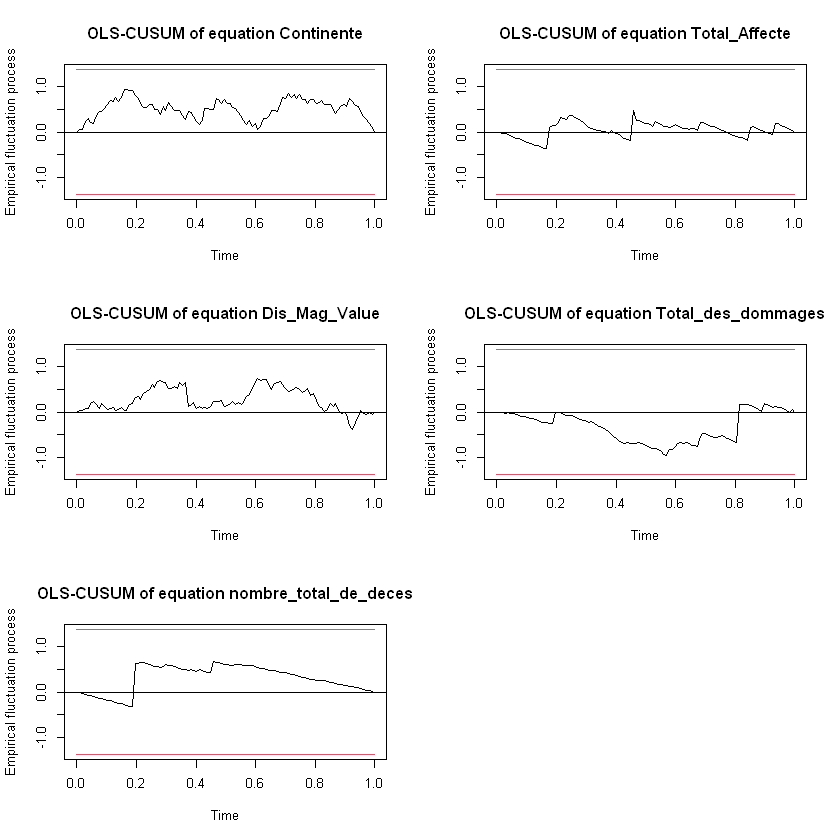

In [11]:
# Test de stabilité
stability_test <- stability(var_model)
plot(stability_test)

# Test des résidus
serial_test <- serial.test(var_model, lags.pt = 16, type = "PT.asymptotic")
print(serial_test)

##### Interprétation:
- La p-valeur de **0.9991** étant très élevée, nous n'avons pas de preuve suffisante pour rejeter l'hypothèse nulle d'absence d'auto-corrélation des résidus. Cela indique que les résidus du modèle VAR ne présentent pas de corrélation en série significative, ce qui est un bon signe pour la validité du modèle.

##### Plots OLS-CUSUM des différentes équations:

- Les graphiques OLS-CUSUM montrent le processus de fluctuation empirique au fil du temps pour les différentes équations (<code>Continente</code>, <code>Total_Affecte</code>, <code>Dis_Mag_Value</code>, <code>Total_des_dommages</code>, et <code>nombre_total_de_deces</code>).

- Les courbes de fluctuation empirique restent généralement stables au fil du temps, ce qui suggère que les coefficients de régression sont stables et que le modèle VAR est globalement stable.

>Les diagnostics du modèle VAR indiquent que le modèle est bien spécifié et stable. Il n'y a pas de preuve d'auto-corrélation significative des résidus, et les coefficients de régression semblent stables au fil du temps.

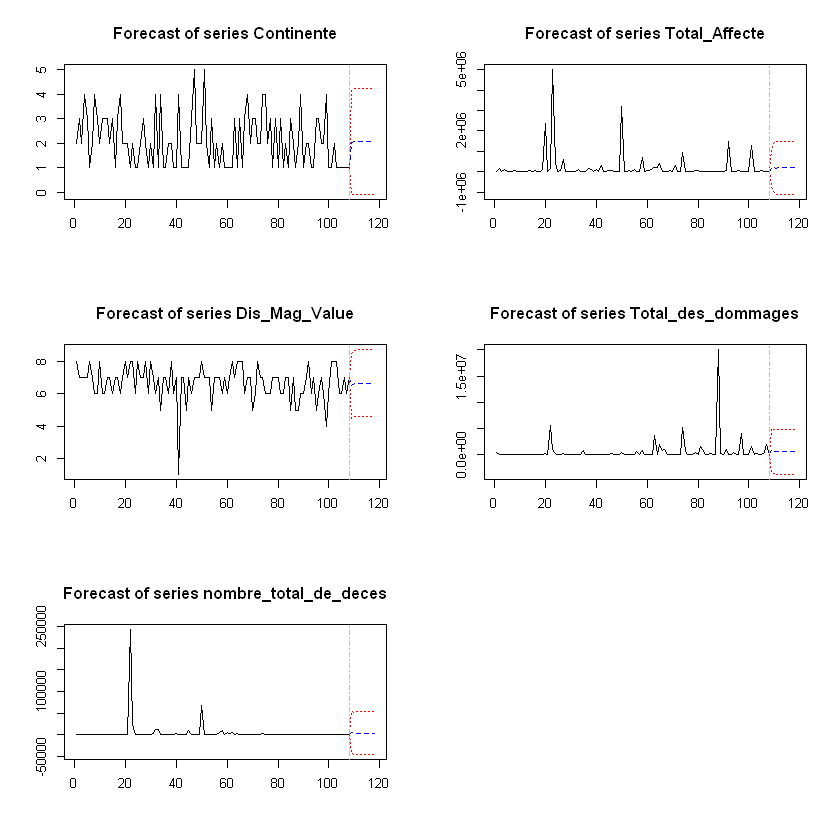

In [12]:
# Prévisions à l'aide du modèle VAR
forecast <- predict(var_model, n.ahead = 10)
plot(forecast)

>Les prévisions du modèle VAR montrent une continuité des tendances observées dans les données historiques. Aucun changement significatif ou fluctuation majeure n'est prévu pour les séries <code>Continente</code>, <code>Total_Affecte</code>, <code>Dis_Mag_Value</code>, <code>Total_des_dommages</code> et <code>nombre_total_de_deces</code>. Le modèle VAR semble bien capturer les dynamiques des données historiques et fournir des prévisions stables pour les prochaines périodes.